In [3]:
# Setup: imports and helper (Qiskit ≥ 1.0)
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import numpy as np

sim = AerSimulator()

def run_and_plot(qc, shots=1024):
    qc = transpile(qc, sim)
    result = sim.run(qc, shots=shots).result()   # no assemble needed
    counts = result.get_counts()
    try:
        display(plot_histogram(counts))
    except Exception:
        print(counts)
    return counts


     ┌───┐     ┌────────────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0           ├┤ H ├┤M├─────────
     ├───┤     │            │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1           ├┤ H ├─╫─┤M├──────
     ├───┤     │            │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 bv_oracle ├┤ H ├─╫──╫─┤M├───
     ├───┤     │            │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3           ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│            │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4           ├──────╫──╫──╫──╫─
     └───┘└───┘└────────────┘      ║  ║  ║  ║ 
c: 4/══════════════════════════════╩══╩══╩══╩═
                                   0  1  2  3 


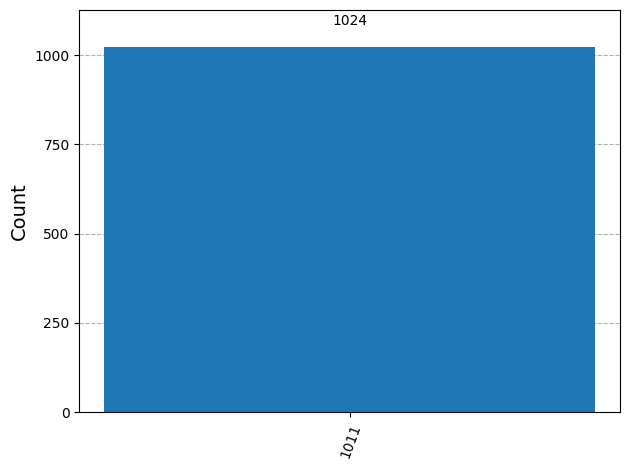

Counts: {'1011': 1024}
Hidden string: 1011


In [4]:
# Bernstein–Vazirani Algorithm
s = '1011'    # hidden string
n = len(s)

# Oracle for hidden string s
def bv_oracle(s):
    n = len(s)
    qc = QuantumCircuit(n+1, name='bv_oracle')
    for i, bit in enumerate(reversed(s)):
        if bit == '1':
            qc.cx(i, n)   # CNOT if bit is 1
    return qc

# BV circuit builder
def bernstein_vazirani(s):
    n = len(s)
    qc = QuantumCircuit(n+1, n)
    
    # Step 1: prepare output qubit in |1>
    qc.x(n)
    qc.h(n)
    
    # Step 2: superposition on input qubits
    qc.h(range(n))
    
    # Step 3: apply oracle
    qc.append(bv_oracle(s).to_gate(), range(n+1))
    
    # Step 4: Hadamard on input qubits
    qc.h(range(n))
    
    # Step 5: measure input qubits
    qc.measure(range(n), range(n))
    
    print(qc.draw(output='text'))
    return run_and_plot(qc)

# Run Bernstein–Vazirani
counts_bv = bernstein_vazirani(s)
print("Counts:", counts_bv)
print("Hidden string:", max(counts_bv, key=counts_bv.get))
